Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [66]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [67]:
df.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [68]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
img = Image(url=url, width=400)

display(img)

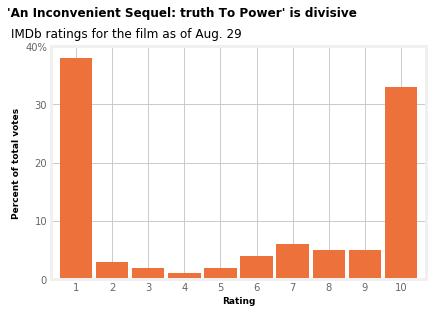

In [131]:
# Set stylesheet
plt.style.use('fivethirtyeight')

# figure axes syntax
fig, ax = plt.subplots()

# Make the figure background color white
fig.patch.set(facecolor='white')

# put bars on the axes
fake.plot.bar(width=0.9, color='#ED713A')

# Set axes background color
ax.set(facecolor='white')

# Set plot title
ax.set_title("'An Inconvenient Sequel: truth To Power' is divisive", fontsize=12, fontweight='bold', x=.35, y=1.1) 

# Set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Set plot xlabel
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

# Set subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=41.5, x=-1.8, fontsize=12)

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10, alpha=0.6)
ax.set_yticks(range(0, 41, 10))

# Set x axis labels, tick marks and grid lines
ax.set_xticklabels(range(1, 11, 1), rotation='horizontal', fontsize=10, alpha=0.6)

# Show the plot and squelch the funny output
fig.show()

### Reproduce another example from fivethirtyeight

In [70]:
url = "https://fivethirtyeight.com/wp-content/uploads/2015/07/flowers-datalab-ronda-rousey-4.png?w=575"
img = Image(url=url, width=600)

display(img)

In [0]:
# I couldn't find the data so I threw together a scraper
# this is VERY hacky but it was the best I could do with the time constraints

In [0]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

In [0]:
# since I'm short on time, this cell is directly copied from:
# https://realpython.com/python-web-scraping-practical-introduction/#setting-up-your-python-web-scraper


def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [0]:
import time
import re
from collections import defaultdict

base_url = "http://ufcstats.com/statistics/events/completed?page="
sub_types = {
    "Rear Naked Choke": defaultdict(lambda: 0),
    "Armbar": defaultdict(lambda: 0),
    "Guillotine": defaultdict(lambda: 0),
    "Triangle Choke": defaultdict(lambda: 0),
    "Arm Triangle": defaultdict(lambda: 0),
}

year_re = re.compile(r"(?P<year>20\d\d)")


def processEvent(url, year):
    raw_html = simple_get(url)
    
    if not raw_html:
        return

    html = BeautifulSoup(raw_html)
    
    for key in sub_types.keys():
        ms = re.findall(key, html.text)
        sub_types[key][year] += len(ms)


#for i in range(1, 15):
for i in range(1, 15):   
    
    time.sleep(1)
    
    url = base_url + str(i)
    raw_html = simple_get(url)
    
    if not raw_html:
        continue
    
    html = BeautifulSoup(raw_html)
    for row in html("tr"):
        
        time.sleep(1)
        
        link = row("a")
        date = row("span")
        if not link or not date:
            continue
            
        date_txt = date[0].text.strip()
        m = year_re.search(date_txt)
        year = m.group("year")
        
        processEvent(link[0]["href"], year)



In [280]:
print(sub_types)

{'Rear Naked Choke': defaultdict(<function <lambda> at 0x7f3f7c979b70>, {'2019': 31, '2018': 39, '2017': 36, '2016': 45, '2015': 41, '2014': 41, '2013': 17, '2012': 30, '2011': 22, '2010': 11}), 'Armbar': defaultdict(<function <lambda> at 0x7f3f7c979d90>, {'2019': 9, '2018': 10, '2017': 10, '2016': 7, '2015': 10, '2014': 8, '2013': 10, '2012': 12, '2011': 3, '2010': 6}), 'Guillotine': defaultdict(<function <lambda> at 0x7f3f7c979ae8>, {'2019': 9, '2018': 11, '2017': 11, '2016': 16, '2015': 24, '2014': 20, '2013': 15, '2012': 14, '2011': 14, '2010': 9}), 'Triangle Choke': defaultdict(<function <lambda> at 0x7f3f7c979840>, {'2019': 4, '2018': 6, '2017': 2, '2016': 3, '2015': 6, '2014': 3, '2013': 6, '2012': 4, '2011': 4, '2010': 6}), 'Arm Triangle': defaultdict(<function <lambda> at 0x7f3f7c979ea0>, {'2019': 8, '2018': 7, '2017': 5, '2016': 8, '2015': 5, '2014': 6, '2013': 8, '2012': 2, '2011': 2, '2010': 4})}


In [0]:
from csv import writer

with open("ufc_submission_stats.csv", "w") as file:
    w = writer(file)
    w.writerow(["year",] + [k for k in sub_types.keys()])
    for year in range(2000, 2019):
        w.writerow([year,] + [sub_types[k][str(year)] for k in sub_types.keys()])
    

### Now that I have the data I can continue with the assignment

In [79]:
df = pd.read_csv("ufc_submission_stats.csv", index_col=0)
df.head()

,Rear Naked Choke,Armbar,Guillotine,Triangle Choke,Arm Triangle
year,,,,,
2010,11,6,9,6,4
2011,22,3,14,4,2
2012,30,12,14,4,2
2013,17,10,15,6,8
2014,41,8,20,3,6


In [80]:
df.div(df.sum(axis=1), axis=0)

,Rear Naked Choke,Armbar,Guillotine,Triangle Choke,Arm Triangle
year,,,,,
2010,0.305556,0.166667,0.250000,0.166667,0.111111
2011,0.488889,0.066667,0.311111,0.088889,0.044444
2012,0.483871,0.193548,0.225806,0.064516,0.032258
2013,0.303571,0.178571,0.267857,0.107143,0.142857
2014,0.525641,0.102564,0.256410,0.038462,0.076923
2015,0.476744,0.116279,0.279070,0.069767,0.058140
2016,0.569620,0.088608,0.202532,0.037975,0.101266
2017,0.562500,0.156250,0.171875,0.031250,0.078125
2018,0.534247,0.136986,0.150685,0.082192,0.095890


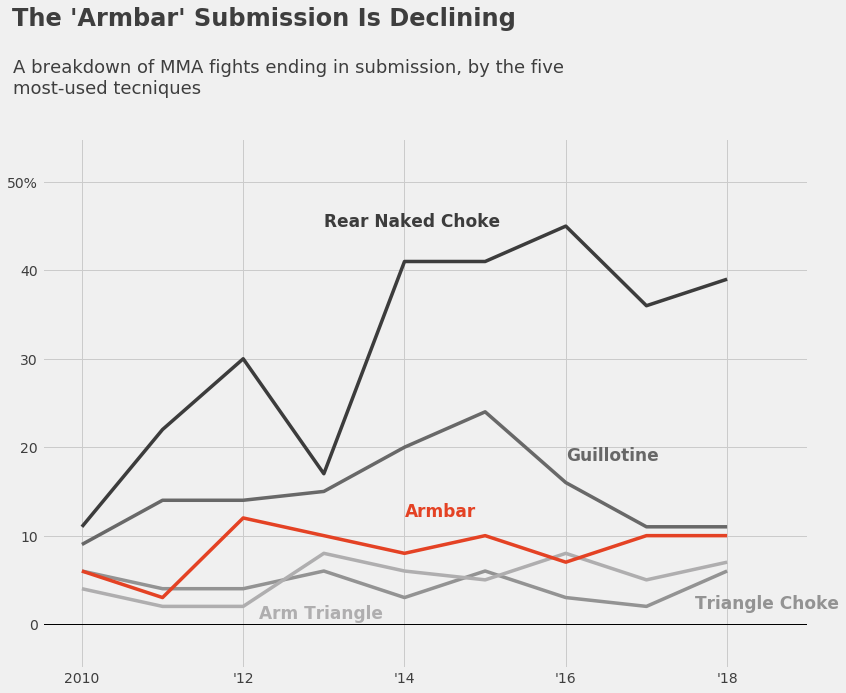

In [276]:
# my dataset is different from the one in the above chart
# so it won't look exactly the same

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(12)

ax.set_ylim(bottom=0, top=51)
ax.set_xlim(left=2010, right=2019)

ax.plot(df.index, df[["Rear Naked Choke"]], color="#3C3C3C", linewidth=3.5)
ax.plot(df.index, df[["Guillotine"]], color="#686868", linewidth=3.5)
ax.plot(df.index, df[["Triangle Choke"]], color="#939393", linewidth=3.5)
ax.plot(df.index, df[["Arm Triangle"]], color="#AFAEAF", linewidth=3.5)
ax.plot(df.index, df[["Armbar"]], color="#E44224", linewidth=3.5)

ax.set_title("The 'Armbar' Submission Is Declining", x=.29, y=1.2, fontsize=24, fontweight=900, color="#3E3E3E")
#ax.text(s="A breakdown of MMA fights ending in submission, by the five most-used techniques", x=-2, y=41, fontsize=16)

ax.set_ylabel("")
ax.set_xlabel("")

ax.text(2009.15, 60, "A breakdown of MMA fights ending in submission, by the five\nmost-used tecniques", fontsize=18, color="#3E3E3E")

ax.text(2013, 45.0, "Rear Naked Choke", color="#3C3C3C", fontweight=850, fontsize=17)
ax.text(2016, 18.5, "Guillotine", color="#686868", fontweight=850, fontsize=17)
ax.text(2017.6, 1.8, "Triangle Choke", color="#939393", fontweight=850, fontsize=17)
ax.text(2012.2, 0.7, "Arm Triangle", color="#AFAEAF", fontweight=850, fontsize=17)
ax.text(2014, 12.2, "Armbar", color="#E44224", fontweight=850, fontsize=17)

ax.set_xticks(range(2010, 2019, 2))
ax.set_yticks(range(0, 51, 10))

ax.set_xbound(lower=2009.5)
ax.set_ybound(lower=-5, upper=55)

ax.set_yticklabels(["0", "10", "20", "30", "40", "50%"], color="#3E3E3E")
ax.set_xticklabels(["2010", "'12", "'14", "'16", "'18"], color="#3E3E3E")

y_grid = ax.yaxis.get_gridlines()
y_grid[0].set_color("k")

fig.tight_layout()

fig.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here